<h3><strong>Section 1: Load Feature-Engineered Data</strong></h3>

In [2]:
# Isolation Forest for Geolocation Anomaly Detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Section 1: Load Feature-Engineered Data
def load_engineered_data(file_path="geo_data_with_features.pkl"):
    """Load the feature-engineered data from Step 4"""
    print("Loading feature-engineered data...")
    df = pd.read_pickle(file_path)
    print(f"Loaded {len(df):,} events with {df.shape[1]} features")
    return df

# Execute Section 1
df = load_engineered_data()
print("Data loaded successfully!")
print(df.info())

Loading feature-engineered data...
Loaded 6,745,765 events with 32 features
Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745765 entries, 0 to 6745764
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   client_id                  object        
 1   event_time                 datetime64[ns]
 2   geohash_4                  int32         
 3   geohash_5                  int32         
 4   geohash_6                  int32         
 5   fold                       int64         
 6   latitude                   float64       
 7   longitude                  float64       
 8   time_diff_hours            float64       
 9   distance_km                float64       
 10  velocity_kmh               float64       
 11  is_ocean                   bool          
 12  is_polar                   bool          
 13  is_desert                  bool          
 14  is_international_waters    b

<h3><strong>Section 2: Prepare Features for Modeling</strong></h3>

In [3]:
def prepare_features(df, features_to_exclude=None):
    """
    Prepare features for Isolation Forest model
    """
    if features_to_exclude is None:
        features_to_exclude = ['client_id', 'event_time', 'fold', 'geohash_4', 'geohash_5', 'geohash_6']
    
    # Identify feature columns (exclude metadata columns)
    feature_columns = [col for col in df.columns if col not in features_to_exclude]
    
    print("Selected feature columns:")
    for col in feature_columns:
        print(f"  - {col}")
    
    # Extract features and handle missing values
    X = df[feature_columns].copy()
    
    # Fill missing values with median for each column
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            X[col].fillna(X[col].median(), inplace=True)
            print(f"Filled missing values in {col} with median")
    
    return X, feature_columns

# Execute Section 2
X, feature_columns = prepare_features(df)
print(f"Prepared {X.shape[1]} features for modeling")

Selected feature columns:
  - latitude
  - longitude
  - time_diff_hours
  - distance_km
  - velocity_kmh
  - is_ocean
  - is_polar
  - is_desert
  - is_international_waters
  - suspicious_location_score
  - home_latitude
  - home_longitude
  - avg_velocity_kmh
  - velocity_std_kmh
  - distance_from_home_km
  - velocity_z_score
  - hour_of_day
  - is_night
  - is_business_hours
  - day_of_week
  - is_weekend
  - month
  - distance_score
  - velocity_anomaly_score
  - time_anomaly_score
  - composite_suspicion_score


C:\Users\DANNYS\AppData\Local\Temp\ipykernel_31068\1299941698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


Filled missing values in time_diff_hours with median


C:\Users\DANNYS\AppData\Local\Temp\ipykernel_31068\1299941698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


Filled missing values in velocity_kmh with median


C:\Users\DANNYS\AppData\Local\Temp\ipykernel_31068\1299941698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
C:\Users\DANNYS\AppData\Local\Temp\ipykernel_31068\1299941698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Filled missing values in avg_velocity_kmh with median
Filled missing values in velocity_std_kmh with median


C:\Users\DANNYS\AppData\Local\Temp\ipykernel_31068\1299941698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


Filled missing values in velocity_z_score with median


C:\Users\DANNYS\AppData\Local\Temp\ipykernel_31068\1299941698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
C:\Users\DANNYS\AppData\Local\Temp\ipykernel_31068\1299941698.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Filled missing values in velocity_anomaly_score with median
Filled missing values in composite_suspicion_score with median
Prepared 26 features for modeling


<h3><strong>Section 3: Train-Test Split (Preserving Fold Structure)</strong></h3>

In [4]:
def train_test_split_preserve_folds(df, X, test_size=0.2, random_state=42):
    """
    Split data into train and test sets while preserving the fold structure
    """
    # Use the fold column to ensure no data leakage
    if 'fold' in df.columns:
        # Use one fold for testing, others for training
        test_fold = df['fold'].max()  # Use the last fold for testing
        train_mask = df['fold'] != test_fold
        test_mask = df['fold'] == test_fold
        
        X_train, X_test = X[train_mask], X[test_mask]
        y_train, y_test = df.loc[train_mask, 'composite_suspicion_score'], df.loc[test_mask, 'composite_suspicion_score']
        
        print(f"Using fold {test_fold} for testing, others for training")
        print(f"Train size: {len(X_train):,}, Test size: {len(X_test):,}")
    else:
        # If no fold column, do random split
        X_train, X_test, y_train, y_test = train_test_split(
            X, df['composite_suspicion_score'], 
            test_size=test_size, random_state=random_state
        )
        print(f"Random train-test split: {len(X_train):,} train, {len(X_test):,} test")
    
    return X_train, X_test, y_train, y_test

# Execute Section 3
X_train, X_test, y_train, y_test = train_test_split_preserve_folds(df, X)

Using fold 4 for testing, others for training
Train size: 5,426,853, Test size: 1,318,912


<h3><strong>Section 4: Scale Features</strong></h3>

In [5]:
# Section 4: Scale Features
def scale_features(X_train, X_test):
    """Scale features for better model performance"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Save the scaler for future use
    joblib.dump(scaler, 'isolation_forest_scaler.pkl')
    print("Features scaled and scaler saved")
    
    return X_train_scaled, X_test_scaled, scaler

# Execute Section 4
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

Features scaled and scaler saved


<h3><strong>Section 5: Train Isolation Forest Model</strong></h3>

In [6]:
# Section 5: Train Isolation Forest Model
def train_isolation_forest(X_train_scaled, contamination=0.05, random_state=42):
    """
    Train Isolation Forest model with specified parameters
    """
    print("Training Isolation Forest model...")
    
    # Initialize model
    iso_forest = IsolationForest(
        n_estimators=100,
        max_samples='auto',
        contamination=contamination,
        max_features=1.0,
        random_state=random_state,
        n_jobs=-1  # Use all available cores
    )
    
    # Train model
    iso_forest.fit(X_train_scaled)
    
    # Save model
    joblib.dump(iso_forest, 'isolation_forest_model.pkl')
    print("Isolation Forest model trained and saved")
    
    return iso_forest

# Execute Section 5
contamination = 0.05  # Estimate that 5% of events are anomalies
iso_forest = train_isolation_forest(X_train_scaled, contamination=contamination)

Training Isolation Forest model...
Isolation Forest model trained and saved


<h3><strong>Section 6: Make Predictions</strong></h3>

In [7]:
def make_predictions(model, X_scaled):
    """Make predictions using trained model"""
    # Get anomaly scores (the lower, the more anomalous)
    scores = model.decision_function(X_scaled)
    
    # Get predictions (-1 for anomalies, 1 for normal points)
    predictions = model.predict(X_scaled)
    
    return scores, predictions

# Execute Section 6
train_scores, train_preds = make_predictions(iso_forest, X_train_scaled)
test_scores, test_preds = make_predictions(iso_forest, X_test_scaled)

# Add predictions to original dataframes
df_train = df[df['fold'] != df['fold'].max()].copy()
df_test = df[df['fold'] == df['fold'].max()].copy()

df_train['anomaly_score'] = train_scores
df_train['is_anomaly'] = train_preds

df_test['anomaly_score'] = test_scores
df_test['is_anomaly'] = test_preds

print("Predictions made and added to dataframes")

Predictions made and added to dataframes


<h3><strong>Section 7: Evaluate Model Performance</strong></h3>

Evaluating model performance...


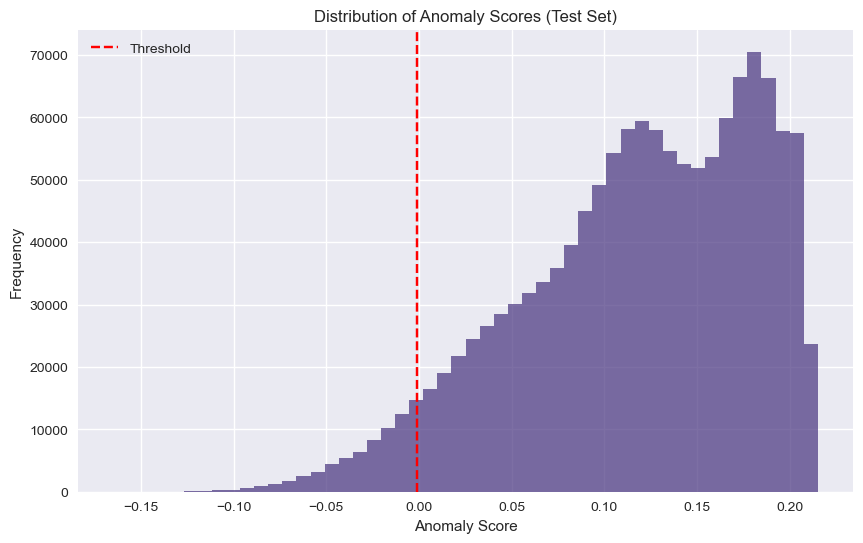

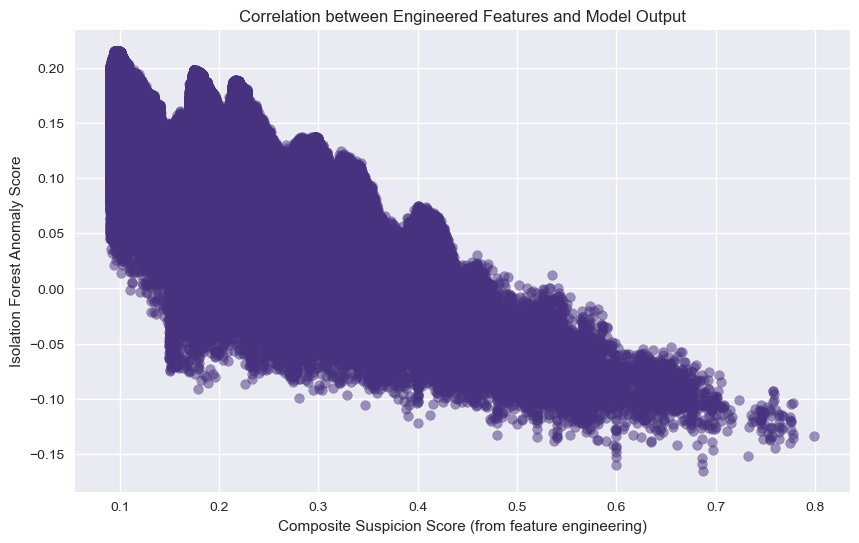

Top 20 anomalies (lowest anomaly scores):
                                                 client_id  \
5420074  d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753...   
5417869  d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753...   
2355312  57b6e2092b76558507cdf4e827691d1d867e8805f2aad6...   
5420984  d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753...   
5422497  d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753...   
5422699  d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753...   
5419431  d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753...   
5516789  d335e5ef93e17b3b7d4ec6f7fc85f1ed496ab7e7fea8b5...   
4205144  a59f80319df8bc650635fede48bf9dec1c4bed78833b10...   
4352935  a9f87ca43cb821e743f9754ba915bb242897fc33a5df23...   
3651948  8cab4d5d944170d56a1f75b023763c5ca98cacef179a3f...   
5421367  d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753...   
1255235  2fc42adc62ccde64c7418f5b6f8cd563966d2e823298ef...   
2355591  57b6e2092b76558507cdf4e827691d1d867e8805f2aad6...   
6630008  fbef4b64f4615daee5b

In [8]:
def evaluate_model(df_test, test_scores, test_preds):
    """Evaluate model performance using various metrics"""
    print("Evaluating model performance...")
    
    # Since we don't have true labels, we'll use the composite suspicion score as a proxy
    # In a real scenario, you would use actual fraud labels
    
    # 1. Distribution of anomaly scores
    plt.figure(figsize=(10, 6))
    plt.hist(test_scores, bins=50, alpha=0.7)
    plt.axvline(np.percentile(test_scores, 100 * contamination), color='r', linestyle='--', label='Threshold')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Anomaly Scores (Test Set)')
    plt.legend()
    plt.show()
    
    # 2. Compare with composite suspicion score
    plt.figure(figsize=(10, 6))
    plt.scatter(df_test['composite_suspicion_score'], test_scores, alpha=0.5)
    plt.xlabel('Composite Suspicion Score (from feature engineering)')
    plt.ylabel('Isolation Forest Anomaly Score')
    plt.title('Correlation between Engineered Features and Model Output')
    plt.show()
    
    # 3. Top anomalies
    top_anomalies = df_test.nsmallest(20, 'anomaly_score')
    print("Top 20 anomalies (lowest anomaly scores):")
    print(top_anomalies[['client_id', 'event_time', 'anomaly_score', 'composite_suspicion_score', 
                         'velocity_kmh', 'distance_from_home_km', 'suspicious_location_score']])
    
    # 4. Percentage of anomalies detected
    anomaly_percentage = (test_preds == -1).sum() / len(test_preds) * 100
    print(f"Anomalies detected: {anomaly_percentage:.2f}% of test set")
    
    # 5. Feature importance (based on model)
    if hasattr(iso_forest, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': iso_forest.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance)
        plt.title('Feature Importance in Isolation Forest Model')
        plt.show()
    
    return top_anomalies

# Execute Section 7
top_anomalies = evaluate_model(df_test, test_scores, test_preds)

<h3><strong>Section 8: Analyze Detected Anomalies</strong></h3>

Analyzing detected anomalies...
Types of anomalies detected in top 20:
  - Ocean locations: 13
  - Polar regions: 7
  - Desert areas: 0
  - Velocity anomalies: 16


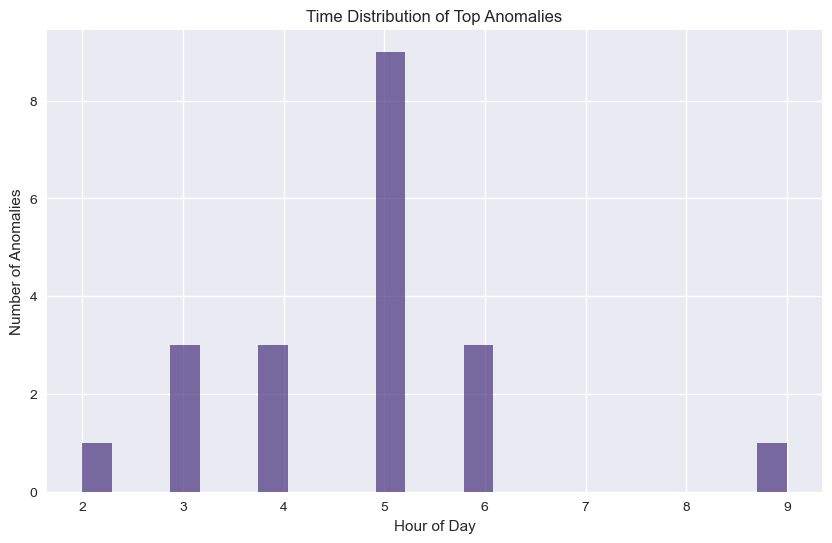

Anomalies distributed across 10 clients
Clients with most anomalies:
client_id
d0ad773a1eb8ea291ea52a8a0ede7097d15c883204f753eef5cfb48c8bf75e05    8
57b6e2092b76558507cdf4e827691d1d867e8805f2aad64e4ecf35bc50b2a8cb    3
8cab4d5d944170d56a1f75b023763c5ca98cacef179a3f5e67c02cc9ce9e8934    2
d335e5ef93e17b3b7d4ec6f7fc85f1ed496ab7e7fea8b5c81b9a09f34cc2471f    1
a59f80319df8bc650635fede48bf9dec1c4bed78833b10e6c59d308c826b11ed    1
Name: count, dtype: int64


In [17]:
def analyze_anomalies(df, top_anomalies):
    """Perform detailed analysis of detected anomalies"""
    print("Analyzing detected anomalies...")
    
    # 1. Types of anomalies detected
    anomaly_types = {}
    if 'is_ocean' in df.columns:
        ocean_anomalies = top_anomalies['is_ocean'].sum()
        anomaly_types['Ocean locations'] = ocean_anomalies
    
    if 'is_polar' in df.columns:
        polar_anomalies = top_anomalies['is_polar'].sum()
        anomaly_types['Polar regions'] = polar_anomalies
    
    if 'is_desert' in df.columns:
        desert_anomalies = top_anomalies['is_desert'].sum()
        anomaly_types['Desert areas'] = desert_anomalies
    
    if 'velocity_z_score' in df.columns:
        velocity_anomalies = (top_anomalies['velocity_z_score'].abs() > 3).sum()
        anomaly_types['Velocity anomalies'] = velocity_anomalies
    
    print("Types of anomalies detected in top 20:")
    for anomaly_type, count in anomaly_types.items():
        print(f"  - {anomaly_type}: {count}")
    
    # 2. Time patterns of anomalies
    if 'hour_of_day' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.hist(top_anomalies['hour_of_day'], bins=24, alpha=0.7)
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Anomalies')
        plt.title('Time Distribution of Top Anomalies')
        plt.show()
    
    # 3. Client distribution of anomalies
    client_anomaly_counts = top_anomalies['client_id'].value_counts()
    print(f"Anomalies distributed across {len(client_anomaly_counts)} clients")
    print("Clients with most anomalies:")
    print(client_anomaly_counts.head())
    
    return anomaly_types

# Execute Section 8
anomaly_types = analyze_anomalies(df_test, top_anomalies)

In [15]:
# Find optimal threshold based on your composite score
composite_threshold = 0.7  # Example threshold from your engineering
anomaly_threshold = np.percentile(df_test['anomaly_score'], 5)

# See how they compare
agreement = ((df_test['composite_suspicion_score'] > composite_threshold) == 
             (df_test['anomaly_score'] < anomaly_threshold)).mean()

print(f"Agreement between methods: {agreement:.2%}")

Agreement between methods: 95.01%


In [12]:
# Cases where methods disagree
false_negatives = df_test[(df_test['composite_suspicion_score'] > composite_threshold) & 
                          (df_test['anomaly_score'] > anomaly_threshold)]

false_positives = df_test[(df_test['composite_suspicion_score'] < composite_threshold) & 
                          (df_test['anomaly_score'] < anomaly_threshold)]

print(f"Potential false negatives: {len(false_negatives)}")
print(f"Potential false positives: {len(false_positives)}")

Potential false negatives: 0
Potential false positives: 65813


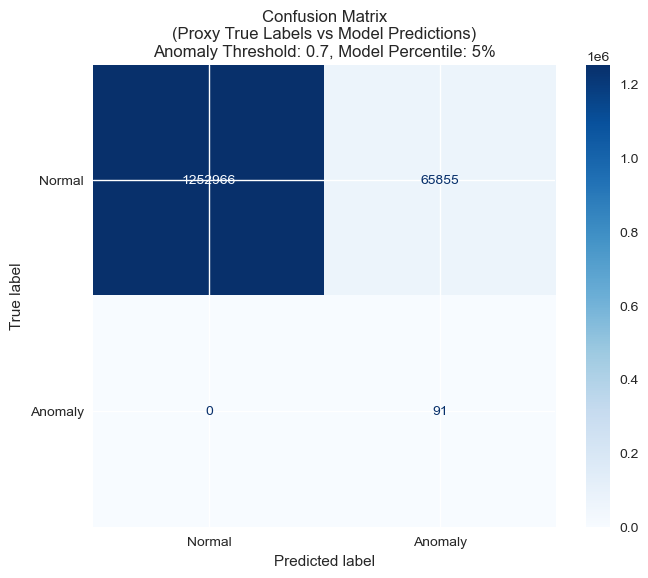

Confusion Matrix Analysis:
Model threshold: anomaly_score < -0.0011
Composite score threshold: > 0.7

True Negatives (Normal correctly identified): 1252966 (95.0%)
False Positives (Normal incorrectly flagged): 65855 (5.0%)
False Negatives (Anomalies missed): 0 (0.0%)
True Positives (Anomalies correctly caught): 91 (0.0%)

Accuracy: 0.950
Precision: 0.001
Recall: 1.000
F1-Score: 0.003


In [18]:
# Create a confusion matrix using composite suspicion score as proxy truth
def create_confusion_matrix_analysis(df, anomaly_threshold=0.7, model_threshold_percentile=5):
    """
    Create a confusion matrix using composite suspicion score as proxy for true labels
    
    Parameters:
    df: DataFrame with anomaly scores and composite suspicion scores
    anomaly_threshold: Threshold for composite suspicion score (0-1)
    model_threshold_percentile: Percentile for model anomaly score threshold
    """
    
    # Set thresholds
    model_threshold = np.percentile(df['anomaly_score'], model_threshold_percentile)
    
    # Create proxy true labels (based on composite suspicion score)
    df['true_label_proxy'] = (df['composite_suspicion_score'] > anomaly_threshold).astype(int)
    
    # Create model predictions (based on anomaly score)
    df['model_prediction'] = (df['anomaly_score'] < model_threshold).astype(int)
    
    # Create confusion matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    cm = confusion_matrix(df['true_label_proxy'], df['model_prediction'])
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=['Normal', 'Anomaly'])
    
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title(f'Confusion Matrix\n(Proxy True Labels vs Model Predictions)\nAnomaly Threshold: {anomaly_threshold}, Model Percentile: {model_threshold_percentile}%')
    plt.show()
    
    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    
    total = tn + fp + fn + tp
    accuracy = (tp + tn) / total
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Create metrics dataframe
    metrics_df = pd.DataFrame({
        'Metric': ['True Negatives', 'False Positives', 'False Negatives', 'True Positives', 
                   'Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Value': [tn, fp, fn, tp, accuracy, precision, recall, f1_score],
        'Description': [
            'Normal events correctly identified as normal',
            'Normal events incorrectly flagged as anomalies',
            'Anomalous events missed by the model',
            'Anomalous events correctly identified',
            'Overall correctness of predictions',
            'Of events predicted as anomalies, how many were actually anomalous',
            'Of actual anomalies, how many were correctly identified',
            'Harmonic mean of precision and recall'
        ]
    })
    
    print("Confusion Matrix Analysis:")
    print(f"Model threshold: anomaly_score < {model_threshold:.4f}")
    print(f"Composite score threshold: > {anomaly_threshold}")
    print("\n" + "="*50)
    print(f"True Negatives (Normal correctly identified): {tn} ({tn/total*100:.1f}%)")
    print(f"False Positives (Normal incorrectly flagged): {fp} ({fp/total*100:.1f}%)")
    print(f"False Negatives (Anomalies missed): {fn} ({fn/total*100:.1f}%)")
    print(f"True Positives (Anomalies correctly caught): {tp} ({tp/total*100:.1f}%)")
    print("\n" + "="*50)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1_score:.3f}")
    
    return metrics_df, cm

# Execute the confusion matrix analysis
metrics_df, cm = create_confusion_matrix_analysis(df_test, anomaly_threshold=0.7, model_threshold_percentile=5)

Threshold Exploration Results:
   anomaly_threshold  model_percentile  true_positives  false_positives  \
0                0.5                 1            5844             7346   
1                0.5                 3            8080            31488   
2                0.5                 5            8145            57801   
4                0.6                 1             903            12287   
3                0.5                10            8152           123740   
5                0.6                 3             903            38665   
6                0.6                 5             903            65043   
8                0.7                 1              91            13099   
7                0.6                10             903           130989   
9                0.7                 3              91            39477   

   true_negatives  false_negatives  precision    recall  f1_score  
0         1303414             2308   0.443063  0.716879  0.547653  
1      

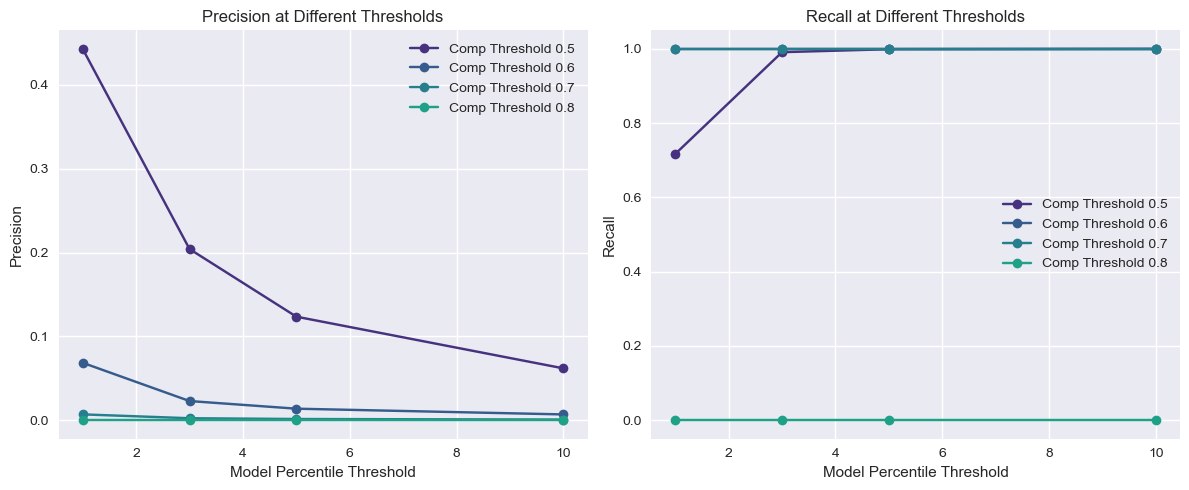

In [19]:
# Interactive threshold exploration
def explore_thresholds(df, anomaly_thresholds=[0.5, 0.6, 0.7, 0.8], model_percentiles=[1, 3, 5, 10]):
    """
    Explore different threshold combinations for the confusion matrix
    """
    results = []
    
    for ath in anomaly_thresholds:
        for perc in model_percentiles:
            # Set thresholds
            model_threshold = np.percentile(df['anomaly_score'], perc)
            
            # Create proxy labels
            true_labels = (df['composite_suspicion_score'] > ath).astype(int)
            pred_labels = (df['anomaly_score'] < model_threshold).astype(int)
            
            # Calculate metrics
            cm = confusion_matrix(true_labels, pred_labels)
            tn, fp, fn, tp = cm.ravel()
            
            total = tn + fp + fn + tp
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            
            results.append({
                'anomaly_threshold': ath,
                'model_percentile': perc,
                'true_positives': tp,
                'false_positives': fp,
                'true_negatives': tn,
                'false_negatives': fn,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            })
    
    return pd.DataFrame(results)

# Execute threshold exploration
threshold_results = explore_thresholds(df_test)

# Display results
print("Threshold Exploration Results:")
print(threshold_results.sort_values('f1_score', ascending=False).head(10))

# Visualize the trade-offs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for ath in threshold_results['anomaly_threshold'].unique():
    subset = threshold_results[threshold_results['anomaly_threshold'] == ath]
    plt.plot(subset['model_percentile'], subset['precision'], 'o-', label=f'Comp Threshold {ath}')
plt.xlabel('Model Percentile Threshold')
plt.ylabel('Precision')
plt.title('Precision at Different Thresholds')
plt.legend()

plt.subplot(1, 2, 2)
for ath in threshold_results['anomaly_threshold'].unique():
    subset = threshold_results[threshold_results['anomaly_threshold'] == ath]
    plt.plot(subset['model_percentile'], subset['recall'], 'o-', label=f'Comp Threshold {ath}')
plt.xlabel('Model Percentile Threshold')
plt.ylabel('Recall')
plt.title('Recall at Different Thresholds')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Find the optimal threshold combination
optimal_idx = threshold_results['f1_score'].idxmax()
optimal_settings = threshold_results.loc[optimal_idx]

print("Optimal Threshold Settings:")
print(f"Composite Score Threshold: {optimal_settings['anomaly_threshold']}")
print(f"Model Percentile Threshold: {optimal_settings['model_percentile']}%")
print(f"F1-Score: {optimal_settings['f1_score']:.3f}")

Optimal Threshold Settings:
Composite Score Threshold: 0.5
Model Percentile Threshold: 1.0%
F1-Score: 0.548


<h3><strong>Section 9: Save Results and Create Summary Report</strong></h3>

In [9]:
def save_results(df_train, df_test, output_file="anomaly_detection_results.pkl"):
    """Save all results to a file"""
    # Combine train and test results
    df_all = pd.concat([df_train, df_test], ignore_index=True)
    
    # Save results
    df_all.to_pickle(output_file)
    print(f"All results saved to {output_file}")
    
    # Create summary report
    summary = {
        'total_events': len(df_all),
        'anomalies_detected': (df_all['is_anomaly'] == -1).sum(),
        'anomaly_percentage': (df_all['is_anomaly'] == -1).sum() / len(df_all) * 100,
        'top_anomaly_types': anomaly_types,
        'model_parameters': {
            'contamination': contamination,
            'n_estimators': 100,
            'max_samples': 'auto'
        }
    }
    
    print("\n=== SUMMARY REPORT ===")
    print(f"Total events processed: {summary['total_events']:,}")
    print(f"Anomalies detected: {summary['anomalies_detected']:,} ({summary['anomaly_percentage']:.2f}%)")
    print("Top anomaly types:")
    for anomaly_type, count in summary['top_anomaly_types'].items():
        print(f"  - {anomaly_type}: {count}")
    
    return summary

# Execute Section 9
summary = save_results(df_train, df_test)

All results saved to anomaly_detection_results.pkl

=== SUMMARY REPORT ===
Total events processed: 6,745,765
Anomalies detected: 339,387 (5.03%)
Top anomaly types:
  - Ocean locations: 13
  - Polar regions: 7
  - Desert areas: 0
  - Velocity anomalies: 16
